In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors 
import sklearn
import itertools
from sklearn.cluster import KMeans
import time 


mat = scipy.io.loadmat('mnist-original.mat') 
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(28,28) for i in range(len(data)) ]

**Trois clusters**

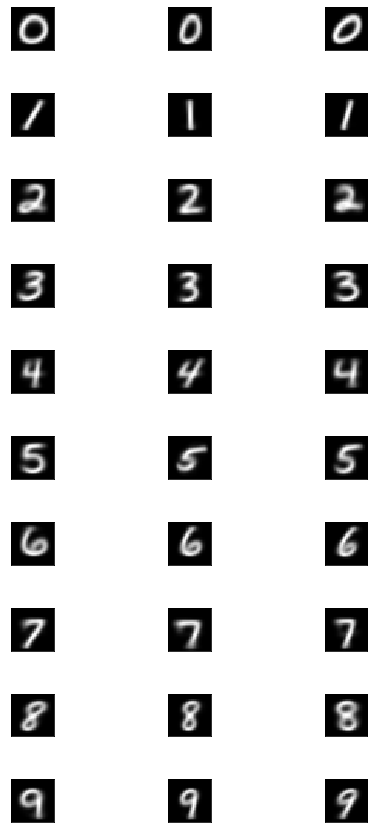

temps d'execution : 134.33683371543884secondes.


In [2]:
chiffres = range(10)
nb_clusters = 3

fig, ax = plt.subplots(len(chiffres),nb_clusters,figsize=(15,15))
for i in ax.flat:
        i.set(xticks=[], yticks=[])

start = time.time()

for j,k in zip(range(len(chiffres)),chiffres):
    idx = np.where((label == k))[0]
    Xk = np.array(data)[idx]    
    Ykk = np.array(label)[idx]
    Yk = np.reshape(Ykk, (len(Ykk),))
    kmeans = sklearn.cluster.KMeans(n_clusters=nb_clusters).fit(Xk,Yk)
    centroidk = kmeans.cluster_centers_
    for i in range(nb_clusters):
        ax[j, i].imshow(np.reshape(centroidk[i], (28,28)),cmap='gray') 
fig.subplots_adjust(hspace=1.0, wspace=-0.7)
plt.show()
end = time.time()
print("temps d'execution : "+str(end-start)+ "secondes.")

**Deux clusters**

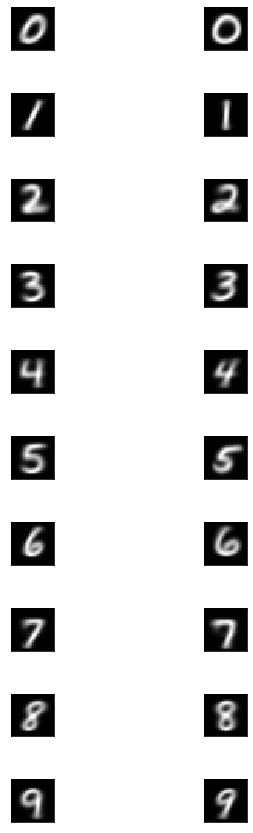

In [3]:
chiffres = range(10)
nb_clusters = 2

fig, ax = plt.subplots(len(chiffres),nb_clusters,figsize=(15,15))
for i in ax.flat:
        i.set(xticks=[], yticks=[])

for j,k in zip(range(len(chiffres)),chiffres):
    idx = np.where((label == k))[0]
    Xk = np.array(data)[idx]    
    Ykk = np.array(label)[idx]
    Yk = np.reshape(Ykk, (len(Ykk),))
    kmeans = sklearn.cluster.KMeans(n_clusters=nb_clusters).fit(Xk,Yk)
    centroidk = kmeans.cluster_centers_
    for i in range(nb_clusters):
        ax[j, i].imshow(np.reshape(centroidk[i], (28,28)),cmap='gray') 
fig.subplots_adjust(hspace=1.0, wspace=-0.7)
plt.show()

**Tentative de voir qui se sépare bien**

In [44]:
chiffres = range(10)

start = time.time()

centroides = [[0]*4 for k in range(10)]
means = [[0]*4 for k in range(10)]
coherences = [[0]*4 for k in range(10)]

for l in range(4):
    nb_clusters = l+2
    for k in chiffres: #séparation en l clusters des 10 chiffres
        idx = np.where((label == k))[0]
        Xk = np.array(data)[idx]    
        Ykk = np.array(label)[idx]
        Yk = np.reshape(Ykk, (len(Ykk),))
        kmeans = sklearn.cluster.KMeans(n_clusters=nb_clusters).fit(Xk,Yk)
        centroides[k][l] = list(kmeans.cluster_centers_) #la l-ieme ligne a les l représentants des l clusters des 10 chiffres dans chaque colonne
        means[k][l] = np.mean(kmeans.cluster_centers_) # la l-ieme ligne a le mean des l centroides des l centroides des 10 chiffres                                              
end = time.time()
print("temps d'execution : "+str(end-start)+ "secondes.")

temps d'execution : 589.5080993175507secondes.


**Coherence au sens du livre**

In [ ]:
for l in range(4):
    for k in chiffres:
        mean = sum(centroides[k][l])/len(centroides[k][l])
        coherences[k][l] = sum([np.linalg.norm(image - mean ,2)**2 for image in centroides[k][l]])

**Graph**

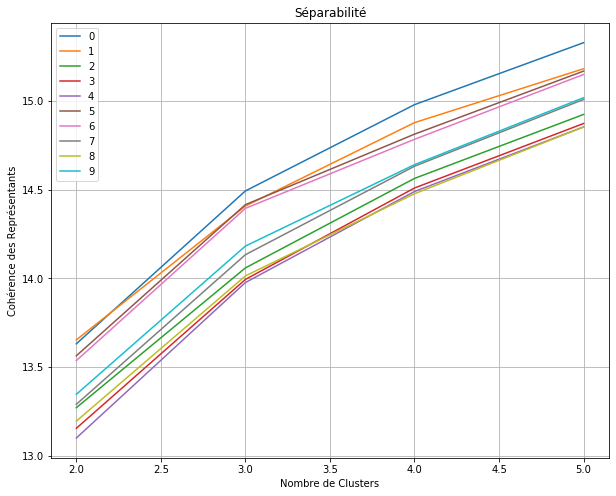

In [66]:
abc = [2,3,4,5]
plt.figure(figsize=(10,8))
for k in chiffres:
    plt.plot(abc, [np.log(x) for x in coherences[k]], label=str(k))
plt.xlabel('Nombre de Clusters')
plt.ylabel('Cohérence des Représentants')
plt.title("Séparabilité")
plt.grid()
plt.legend()

**Coherence2 au sens de moyenne des distances a leur barycentre centre**

In [51]:
coherence2 = [[0]*4 for k in range(10)]
for l in range(4):
    for k in range(10):
        mean = means[k][l]
        coherence2[k][l] = sum([np.linalg.norm(mean - image) for image in centroides[k][l]],2)/len(centroides[k][l])

**Graph**

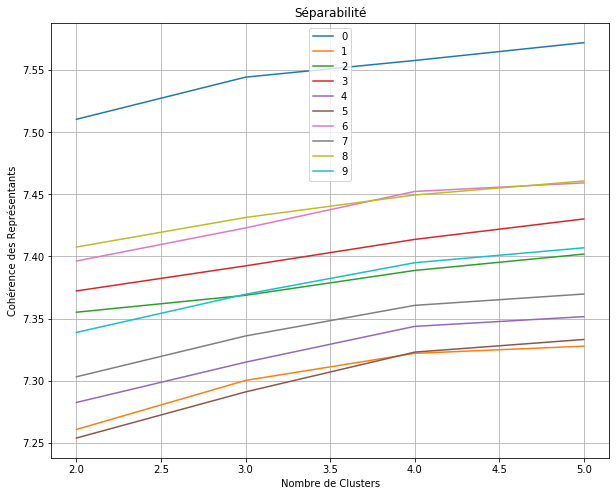

In [72]:
abc = [2,3,4,5]
plt.figure(figsize=(10,8))
for k in chiffres:
    plt.plot(abc, [np.log(x) for x in coherence2[k]], label=str(k))
plt.xlabel('Nombre de Clusters')
plt.ylabel('Cohérence des Représentants')
plt.title("Séparabilité")
plt.grid()
plt.legend()

**Coherence au sens moyenne des distances au centre de la methode 1**

In [67]:
def index_chiffre(n, y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    return [i for i in range(len(y)) if y[i]==n] 

def image_moyenne(n, X, y): # cette fonction renvoie la matrice moyenne (centroïde) pour le chiffre n
    index = index_chiffre(n, y) 
    sum_matrice = np.zeros((28,28)) # la matrice qui sera utilisée dans la somme
    for i in index:
        sum_matrice += X[i] # on somme toutes les matrices représentants le chiffre n
    return sum_matrice/len(index)

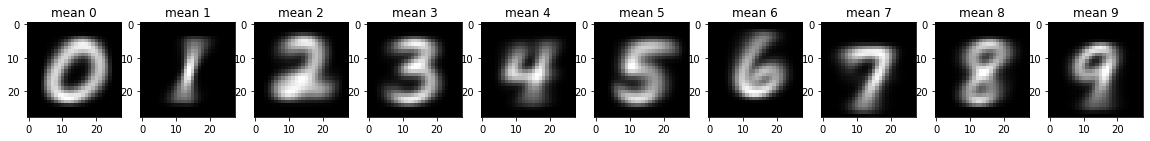

In [68]:
centroide_train = [(image_moyenne(i, X, label)) for i in range(10)]
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroide_train[i],cmap='gray')
    ax[i].set_title("mean "+str(i))

In [70]:
coherence3 = [[0]*4 for k in range(10)]
for l in range(4):
    for k in range(10):
        coherence3[k][l] = sum([np.linalg.norm(np.reshape(centroide_train[k],(784,)) - image) for image in centroides[k][l]],2)/len(centroides[k][l])

**Graph**

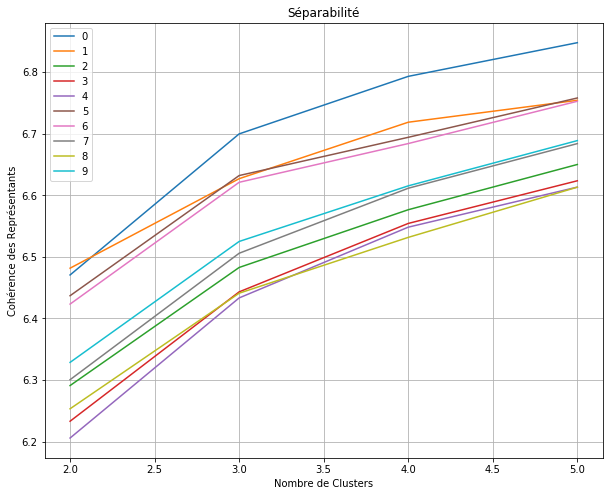

In [73]:
abc = [2,3,4,5]
plt.figure(figsize=(10,8))
for k in chiffres:
    plt.plot(abc, [np.log(x) for x in coherence3[k]], label=str(k))
plt.xlabel('Nombre de Clusters')
plt.ylabel('Cohérence des Représentants')
plt.title("Séparabilité")
plt.grid()
plt.legend()